- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
import pandas as pd
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

from functions import *
from preprocess_NLP import *
from os import listdir
from os.path import isfile, join

# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# import spacy

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud ### WARNINGS !!
from PIL import Image

# import plotly as px

from pandarallel import pandarallel

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"

## Part I : Exploratory Data Analysis

##### General overview

In [3]:
data_text = pd.read_csv(input_file)

In [4]:
data_text.head(5)

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [5]:
data_text.tail(5)

,product_name,text,category,target
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0
1049,Uberlyfe Large Vinyl Sticker,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,Baby Care,0


In [6]:
data_text.sample(20)

,product_name,text,category,target
996,L Oreal Eversleek Sulfate - Free Smoothing Sys...,Key Features of L Oreal Eversleek Sulfate - Fr...,Baby Care,0
114,Lollipop Lane Tiddly Wink Safari Bath Set,Flipkart.com is offering Lollipop Lane Tiddly ...,Baby Care,0
14,Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...,Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...,Watches,6
653,Home Creations Polyester Blue Floral Eyelet Do...,Buy Home Creations Polyester Blue Floral Eyele...,Home Furnishing,4
429,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2
991,Seven Seas Stainless Steel Twisting Pull Corks...,Seven Seas Stainless Steel Twisting Pull Corks...,Kitchen & Dining,5
781,Perucci PC-222 Decker Analog Watch - For Men,Perucci PC-222 Decker Analog Watch - For Men ...,Watches,6
862,Techone+ Portable SE122103-WHITE USB Led Light,Techone+ Portable SE122103-WHITE USB Led Light...,Computers,2
696,Tallenge Christmas Collection - Nativity Art -...,Tallenge Christmas Collection - Nativity Art -...,Home Decor & Festive Needs,3
478,"Cotonex Yellow, Green Cotton Kitchen Linen Set","Cotonex Yellow, Green Cotton Kitchen Linen Set...",Home Furnishing,4


##### Global Statistics

In [7]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1050 non-null   object
 1   text          1050 non-null   object
 2   category      1050 non-null   object
 3   target        1050 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 32.9+ KB


In [8]:
data_text.isna().sum()

product_name    0
text            0
category        0
target          0
dtype: int64

In [9]:
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
dtype: float64

In [10]:
data_text.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [11]:
data_text.nunique()

product_name    1050
text            1050
category           7
target             7
dtype: int64

In [12]:
data_text.shape

(1050, 4)

In [13]:
idx = data_text.duplicated(subset="text", keep="first")
data_text.loc[idx, :].sort_values("text")

,product_name,text,category,target


In [14]:
data_text.describe(include="object")

,product_name,text,category
count,1050,1050,1050
unique,1050,1050,7
top,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
freq,1,1,150


In [15]:
data_text.target.value_counts(normalize=True)

4    0.142857
0    0.142857
6    0.142857
3    0.142857
5    0.142857
1    0.142857
2    0.142857
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

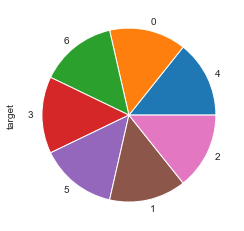

In [16]:
data_text.target.value_counts().plot(kind="pie")

##### Length

In [17]:
data_text.text.apply(lambda i: len(i))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: text, Length: 1050, dtype: int64

<AxesSubplot:xlabel='text'>

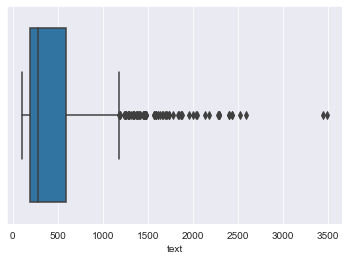

In [18]:
tmp = data_text.text.str.len()
data_text["_len_txt_"] = tmp

sns.boxplot(tmp)

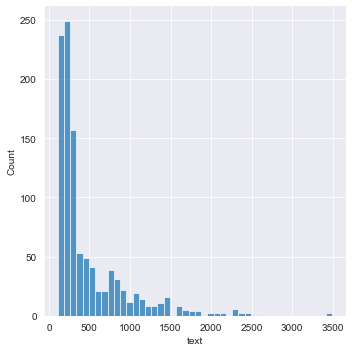

In [19]:
sns.displot(tmp)

<AxesSubplot:xlabel='product_name'>

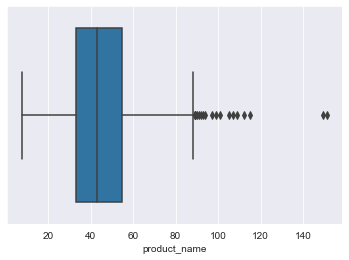

In [20]:
tmp = data_text.product_name.str.len()
data_text["_len_product_name_"] = tmp

sns.boxplot(tmp)

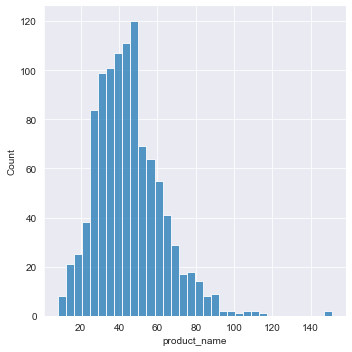

In [21]:
sns.displot(tmp)

In [22]:
data_text

,product_name,text,category,target,_len_txt_,_len_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,1420,58
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,444,26
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,1258,35
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,858,63
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,1197,53
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,1660,38
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,262,65
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,210,39


##### Multivariate analysis

In [23]:
corr = data_text.corr()
corr

,target,_len_txt_,_len_product_name_
target,1.000000,-0.020285,-0.011436
_len_txt_,-0.020285,1.000000,0.174393
_len_product_name_,-0.011436,0.174393,1.000000


<AxesSubplot:>

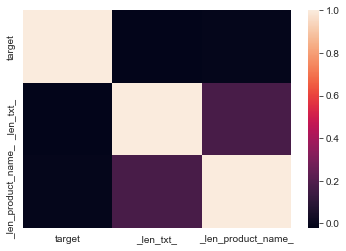

In [24]:
sns.heatmap(corr)

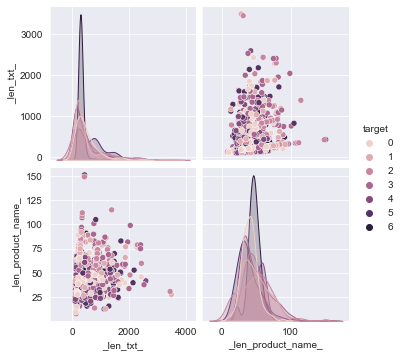

In [25]:
sns.pairplot(data_text, hue="target")

In [26]:
data_text.sort_values("_len_txt_").head(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
877,Nkp Cotton Bath Towel,Buy Nkp Cotton Bath Towel at Rs. 549 at Flipka...,Home Furnishing,4,109,21
890,IWS Cotton Bath Towel,Buy IWS Cotton Bath Towel at Rs. 299 at Flipka...,Home Furnishing,4,109,21
1030,OMRD RD6697 Hot and cold Pack,Specifications of OMRD RD6697 Hot and cold Pac...,Beauty and Personal Care,1,111,29
651,Marvel Cotton Bath Towel,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,Baby Care,0,112,24
892,MB Cotton Set of Towels,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,Home Furnishing,4,112,23
599,Next Steps Baby Girl's Layered Dress,Next Steps Baby Girl's Layered Dress\r\n ...,Baby Care,0,112,36
1005,Milani Runway shadow Wet/Dry Black Out 3 g,Specifications of Milani Runway shadow Wet/Dry...,Beauty and Personal Care,1,113,42
678,Neyth Cotton Set of Towels,Buy Neyth Cotton Set of Towels at Rs. 170 at F...,Baby Care,0,114,26
874,Mafatlal Cotton Bath Towel,Buy Mafatlal Cotton Bath Towel at Rs. 545 at F...,Home Furnishing,4,114,26
884,Amber Cotton Set of Towels,Buy Amber Cotton Set of Towels at Rs. 239 at F...,Home Furnishing,4,114,26


In [27]:
data_text.sort_values("_len_txt_").tail(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
433,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2297,79
435,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2298,79
696,Tallenge Christmas Collection - Nativity Art -...,Tallenge Christmas Collection - Nativity Art -...,Home Decor & Festive Needs,3,2405,75
694,Tallenge Christmas Collection - Echoes Of Wint...,Tallenge Christmas Collection - Echoes Of Wint...,Home Decor & Festive Needs,3,2409,79
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
589,"Shopfloor.XYZ Vacuum Cleaner for Computers, La...","Shopfloor.XYZ Vacuum Cleaner for Computers, La...",Computers,2,2436,60
916,wallskart Floral & Botanical Wallpaper,Key Features of wallskart Floral & Botanical W...,Home Decor & Festive Needs,3,2529,38
715,Pioneer Pragati Floral Single Duvet Orange,Pioneer Pragati Floral Single Duvet Orange (1 ...,Home Furnishing,4,2594,42
639,Sunlast 16 inch Laptop Backpack,Key Features of Sunlast 16 inch Laptop Backpac...,Computers,2,3447,31
437,HomeEdge Solid Wood King Bed,Key Features of HomeEdge Solid Wood King Bed K...,Beauty and Personal Care,1,3490,28


In [28]:
data_text = data_text.drop(columns=["_len_txt_", "_len_product_name_"])
data_text

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


#### Explore corpus and documents

##### 1) print N random documents

In [29]:
df_sample = data_text.sample(20)
df_sample

,product_name,text,category,target
223,Agromech YIBOO Rolling Pizza Cutter,Agromech YIBOO Rolling Pizza Cutter (Stainless...,Kitchen & Dining,5
117,"Anthill Baby Boy's, Baby Girl's Bodysuit","Anthill Baby Boy's, Baby Girl's Bodysuit - Buy...",Baby Care,0
875,Nikunj Abstract Cushions Cover,"Nikunj Abstract Cushions Cover (Pack of 5, 40 ...",Home Furnishing,4
154,Rockmantra Cute Beautiful Girl Playing With He...,Rockmantra Cute Beautiful Girl Playing With He...,Kitchen & Dining,5
888,Trident Cotton Face Towel,"Trident Cotton Face Towel (1 Hand Towel, 3 Fac...",Home Furnishing,4
260,Monil Cow With Calf Showpiece - 10.2 cm,Buy Monil Cow With Calf Showpiece - 10.2 cm ...,Home Decor & Festive Needs,3
839,Himtek light led 1 USB Led Light,Buy Himtek light led 1 USB Led Light for Rs.11...,Computers,2
330,Asus RT-N12 LX 300Mbps Wireless Router,Buy Asus RT-N12 LX 300Mbps Wireless Router onl...,Computers,2
481,Lapguard HP Pavilion DV7-6000 Series 6 Cell La...,Buy Lapguard HP Pavilion DV7-6000 Series 6 Cel...,Computers,2
238,Metallino Hard Anodised Kadhai 1.2 L,Buy Metallino Hard Anodised Kadhai 1.2 L for R...,Kitchen & Dining,5


In [30]:
for index, series in df_sample.iterrows():
    text_1 = f"target: {series['target']}\n"
    print(text_1 + series["text"] + "..." + "\n\n")

target: 5
Agromech YIBOO Rolling Pizza Cutter (Stainless Steel Pack of 1)
                         Price: Rs. 138
				
			Pizza cutter with a strong and comfortable grip helps you Slice pizzas very easily.100 % Stainless Steel wheel with Plastic Handle.

Kindly Lookout For "Agromech" Special Barcode For Authenticity Of This Product you can also find our more products by searching as " Agromech" in fliPkart
Pizza cutter with a strong and comfortable grip helps you Slice pizzas very easily.100 % Stainless Steel wheel with Plastic Handle.

Kindly Lookout For "Agromech" Special Barcode For Authenticity Of This Product you can also find our more products by searching as " Agromech" in fliPkart...


target: 0
Anthill Baby Boy's, Baby Girl's Bodysuit - Buy Yellow Anthill Baby Boy's, Baby Girl's Bodysuit For Only Rs. 405 Online in India. Shop Online For Apparels. Huge Collection of Branded Clothes Only at Flipkart.com...


target: 4
Nikunj Abstract Cushions Cover (Pack of 5, 40 cm*40 cm, Grey)

##### 2) print documents vs target

In [31]:
def print_sample(sub_df, n_sample=10):
    """
    Prints out n_sample documents from a corpus
    :param sub_df:
    :param n_sample:
    :return:
    """
    sample = sub_df.sample(n_sample)

    for index, series in sample.iterrows():
        text_1 = f"target: {series['target']}\n"
        print(text_1 + series["text"] + "..." + "\n\n")

In [32]:
df_1 = data_text[data_text.target == 1]
df_1.head()

,product_name,text,category,target
43,Burt s Bees Hair Repair Shea And Grapefruit De...,Key Features of Burt s Bees Hair Repair Shea A...,Beauty and Personal Care,1
49,Suave Naturals Everlasting Sunshine Conditioner,Key Features of Suave Naturals Everlasting Sun...,Beauty and Personal Care,1
56,Borse N16 Make Up And Jewellery Vanity Case,Buy Borse N16 Make Up And Jewellery Vanity Cas...,Beauty and Personal Care,1
57,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Specifications of RYTHMX FB NAIL POLISHES BLAC...,Beauty and Personal Care,1
58,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Key Features of RYTHMX FB NAIL POLISHES BLACK ...,Beauty and Personal Care,1


In [33]:
print_sample(df_1)

target: 1
Key Features of RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORTANT COMBO 60 12 Hours Stay Made in India Soft & Smooth Creamy Matte,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORTANT COMBO 60 (Set of 4) Price: Rs. 399 Rythmx a best Quality Intense fashionable color which comes in chic to vivid shades.Its ultra-creamy texture glides smoothly , covering the creases.,Specifications of RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORTANT COMBO 60 (Set of 4) Combo Set Details Number of Contents in Combo Set 4 Combo Set Contents 2 Nail polish, 2 LIPSTICKS Organic Yes Ideal For Women General Traits Professional Care Yes Warranty After use Lipsticks No Exchange / No Return...


target: 1
Key Features of Allin Exporters Fennel Oil (Co2 Extract) Ideal For: Men, Women Application Area: All Skin Type: Combination Skin Organic Type: Organic,Allin Exporters Fennel Oil (Co2 Extract) (30 ml) Price: Rs. 649 Obtained through the method of Supercritical Fluid or Co2 extraction process from the seeds 

In [34]:
df_6 = data_text[data_text.target == 6]
print_sample(df_6)

target: 6
Sonata 1141YM22 Analog Watch  - For Men - Buy Sonata 1141YM22 Analog Watch  - For Men  1141YM22 Online at Rs.949 in India Only at Flipkart.com. Round Dial, Water Resistant, Golden Strap, Deployment Clasp - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Timewel 1100-N1949_B Analog Watch  - For Women - Buy Timewel 1100-N1949_B Analog Watch  - For Women  1100-N1949_B Online at Rs.855 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Maxima 29923LPGY Analog Watch  - For Men - Buy Maxima 29923LPGY Analog Watch  - For Men  29923LPGY Online at Rs.800 in India Only at Flipkart.com. Stainless Steel Back Case, Brown Strap, Water Resistant, Buckle Clasp, Round Dial - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Lenco Bdblue Tango Analog Watch  - 

## Part II : Text processing

##### Downloads and options

In [35]:
# download

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [36]:
# pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=6
                       #, verbose=1
)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [37]:
# init sns
sns.set()

##### Loading data

In [38]:
data_text.head()

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [39]:
data_text.shape

(1050, 4)

### I) Cleaning the corpus

#### Work on a specific document

In [40]:
# select a random document

doc = data_text.text.sample(1) # get a row
doc = doc.values[0] # get a numpy array
doc

'Key Features of painting_art_couple_love__Dance Paper Print Good lamination High quality paper lovelly Printing,painting_art_couple_love__Dance Paper Print (12 inch X 18 inch, Framed) Price: Rs. 199 Shoperite poster is made in high quality paper and lamination,lovelly HD printing,so get good look your wall,300 GSM Paper depth…,Specifications of painting_art_couple_love__Dance Paper Print (12 inch X 18 inch, Framed) Dimensions Paper Depth 300 gsm Weight 100 g Height 12 inch Width 18 inch Poster Details Shape Rectangle Black & White Poster No Category Quotes & Motivation Orientation Landscape Paper Finish Matte Paper Type Paper Print Lamination Yes Artist Name Shoperite Color Poster Yes Frame Details Framed No In the Box Number of Contents in Sales Package 1 Sales Package 1 Poster'

##### 1) Lower

In [41]:
doc = doc.lower()
doc

'key features of painting_art_couple_love__dance paper print good lamination high quality paper lovelly printing,painting_art_couple_love__dance paper print (12 inch x 18 inch, framed) price: rs. 199 shoperite poster is made in high quality paper and lamination,lovelly hd printing,so get good look your wall,300 gsm paper depth…,specifications of painting_art_couple_love__dance paper print (12 inch x 18 inch, framed) dimensions paper depth 300 gsm weight 100 g height 12 inch width 18 inch poster details shape rectangle black & white poster no category quotes & motivation orientation landscape paper finish matte paper type paper print lamination yes artist name shoperite color poster yes frame details framed no in the box number of contents in sales package 1 sales package 1 poster'

##### 2) Tokenization

In [42]:
tokens = word_tokenize(doc)
tokens

['key',
 'features',
 'of',
 'painting_art_couple_love__dance',
 'paper',
 'print',
 'good',
 'lamination',
 'high',
 'quality',
 'paper',
 'lovelly',
 'printing',
 ',',
 'painting_art_couple_love__dance',
 'paper',
 'print',
 '(',
 '12',
 'inch',
 'x',
 '18',
 'inch',
 ',',
 'framed',
 ')',
 'price',
 ':',
 'rs',
 '.',
 '199',
 'shoperite',
 'poster',
 'is',
 'made',
 'in',
 'high',
 'quality',
 'paper',
 'and',
 'lamination',
 ',',
 'lovelly',
 'hd',
 'printing',
 ',',
 'so',
 'get',
 'good',
 'look',
 'your',
 'wall,300',
 'gsm',
 'paper',
 'depth…',
 ',',
 'specifications',
 'of',
 'painting_art_couple_love__dance',
 'paper',
 'print',
 '(',
 '12',
 'inch',
 'x',
 '18',
 'inch',
 ',',
 'framed',
 ')',
 'dimensions',
 'paper',
 'depth',
 '300',
 'gsm',
 'weight',
 '100',
 'g',
 'height',
 '12',
 'inch',
 'width',
 '18',
 'inch',
 'poster',
 'details',
 'shape',
 'rectangle',
 'black',
 '&',
 'white',
 'poster',
 'no',
 'category',
 'quotes',
 '&',
 'motivation',
 'orientation',
 'la

In [43]:
len(tokens)

132

In [44]:
len(set(tokens))

75

In [45]:
display_tokens_info(tokens)

nb tokens 132, nb tokens uniques 75
['key', 'features', 'of', 'painting_art_couple_love__dance', 'paper', 'print', 'good', 'lamination', 'high', 'quality', 'paper', 'lovelly', 'printing', ',', 'painting_art_couple_love__dance', 'paper', 'print', '(', '12', 'inch', 'x', '18', 'inch', ',', 'framed', ')', 'price', ':', 'rs', '.']
['18', 'painting_art_couple_love__dance', 'features', '12', 'good', ':', 'rs', '(', 'print', ',', 'lovelly', 'paper', 'high', 'printing', 'key', 'x', ')', 'of', 'quality', 'framed', '.', 'price', 'lamination', 'inch']


In [46]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 134, nb tokens uniques 75
['key', 'features', 'of', 'painting_art_couple_love__dance', 'paper', 'print', 'good', 'lamination', 'high', 'quality', 'paper', 'lovelly', 'printing', ',', 'painting_art_couple_love__dance', 'paper', 'print', '(', '12', 'inch', 'x', '18', 'inch', ',', 'framed', ')', 'price', ':', 'rs', '.']
['18', 'painting_art_couple_love__dance', 'features', '12', 'good', ':', 'rs', '(', 'print', ',', 'lovelly', 'paper', 'high', 'printing', 'key', 'x', ')', 'of', 'quality', 'framed', '.', 'price', 'lamination', 'inch']


##### 3) Stopwords

In [47]:
# stop_words

#global stop_words
#stop_words = set(stopwords.words('english'))
print(stop_words)

{'shan', 'its', 'they', 'being', 'which', 'against', 'both', 'do', 'too', "haven't", 'so', 'here', 'same', 'in', "you'll", 'up', "isn't", 'down', 'having', "hasn't", 'about', 'by', 'wouldn', 'out', 'how', 'had', 'it', 'have', "that'll", 'then', 'theirs', "wasn't", 'are', 'o', 're', 'weren', 's', 'aren', "shan't", 'them', 'this', 'if', 'needn', 'didn', 'an', 'some', "she's", 'did', 'we', "you'd", 'now', 'into', 'the', 'doesn', 'very', 'itself', 'who', 'll', 'their', 'be', 'she', 'mightn', 'not', 'should', "it's", 'been', 'to', 'were', 'again', "couldn't", 'couldn', 'once', 'most', 'from', 'don', 'above', 'her', "should've", 'under', "weren't", 'just', 'until', 'between', 'my', 'why', 'only', "doesn't", 'there', 'wasn', 'at', 'before', 'his', 'each', 'myself', 'ours', 'than', "you're", 'hers', 'below', 'further', 'and', 'on', 'is', 'himself', 'what', "needn't", 'because', 'through', 'all', 'any', 'd', 'with', 'you', 'has', 'y', "mightn't", 'that', "wouldn't", 'themselves', 'ourselves', "

In [48]:
tokens = [w for w in tokens if w not in stop_words]

In [49]:
display_tokens_info(tokens)

nb tokens 121, nb tokens uniques 67
['key', 'features', 'painting_art_couple_love__dance', 'paper', 'print', 'good', 'lamination', 'high', 'quality', 'paper', 'lovelly', 'printing', ',', 'painting_art_couple_love__dance', 'paper', 'print', '(', '12', 'inch', 'x', '18', 'inch', ',', 'framed', ')', 'price', ':', 'rs', '.', '199']
['18', '199', 'painting_art_couple_love__dance', 'features', '12', 'good', ':', 'rs', '(', 'print', ',', 'lovelly', 'paper', 'high', ')', 'printing', 'x', 'key', 'quality', 'framed', '.', 'price', 'lamination', 'inch']


In [50]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 119, nb tokens uniques 68
['key', 'features', 'of', 'painting_art_couple_love__dance', 'paper', 'print', 'good', 'lamination', 'high', 'quality', 'paper', 'lovelly', 'printing', 'painting_art_couple_love__dance', 'paper', 'print', '12', 'inch', 'x', '18', 'inch', 'framed', 'price', 'rs', '199', 'shoperite', 'poster', 'is', 'made', 'in']
['made', '18', '199', 'in', 'painting_art_couple_love__dance', 'features', '12', 'good', 'poster', 'is', 'rs', 'print', 'lovelly', 'paper', 'high', 'printing', 'key', 'x', 'of', 'quality', 'framed', 'shoperite', 'price', 'lamination', 'inch']


In [51]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 106, nb tokens uniques 60
['key', 'features', 'painting_art_couple_love__dance', 'paper', 'print', 'good', 'lamination', 'high', 'quality', 'paper', 'lovelly', 'printing', 'painting_art_couple_love__dance', 'paper', 'print', '12', 'inch', 'x', '18', 'inch', 'framed', 'price', 'rs', '199', 'shoperite', 'poster', 'made', 'high', 'quality', 'paper']
['made', '18', '199', 'painting_art_couple_love__dance', 'features', '12', 'good', 'poster', 'rs', 'print', 'lovelly', 'paper', 'high', 'printing', 'key', 'x', 'quality', 'framed', 'shoperite', 'price', 'lamination', 'inch']


##### 4) First cleaning function

In [52]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 106, nb tokens uniques 60
['key', 'features', 'painting_art_couple_love__dance', 'paper', 'print', 'good', 'lamination', 'high', 'quality', 'paper', 'lovelly', 'printing', 'painting_art_couple_love__dance', 'paper', 'print', '12', 'inch', 'x', '18', 'inch', 'framed', 'price', 'rs', '199', 'shoperite', 'poster', 'made', 'high', 'quality', 'paper']
['made', '18', '199', 'painting_art_couple_love__dance', 'features', '12', 'good', 'poster', 'rs', 'print', 'lovelly', 'paper', 'high', 'printing', 'key', 'x', 'quality', 'framed', 'shoperite', 'price', 'lamination', 'inch']


#### Working on the entire corpus

##### 1) Build raw corpus

In [53]:
# join all corpus

raw_corpus = "".join(data_text.text.values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [54]:
len(raw_corpus)

497512

In [55]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['899', 'eyelet', 'cm', 'floral', 'curtain', 'abstract', 'features', 'elegance', '2', '213', 'look', 'pack', 'rs', 'door', 'polyester', 'interiors', 'key', 'enhances', 'height', 'multicolor', 'price']


In [56]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

rs           911
products     631
free         618
delivery     567
cash         564
            ... 
drawerkey      1
680            1
roundbuy       1
homeehub       1
dell           1
Length: 6165, dtype: int64

In [57]:
# visualization

#sns.barplot(x=tmp.index, y=tmp.values)

In [58]:
# 30th most common tokens

tmp.head(30)

rs                911
products          631
free              618
delivery          567
cash              564
genuine           564
shipping          564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
dtype: int64

In [59]:
# 30th last common tokens

tmp.tail(30)

md199hn                 1
seaterspecifications    1
explode                 1
shot                    1
huawei                  1
sport                   1
ski                     1
1399                    1
ac2400                  1
bornbabykids            1
552                     1
4509                    1
ws331c                  1
architecture            1
5199                    1
socket                  1
1150key                 1
6428nc                  1
585                     1
clothing                1
needybee                1
752dru                  1
susceptible             1
linespecifications      1
esteem                  1
drawerkey               1
680                     1
roundbuy                1
homeehub                1
dell                    1
dtype: int64

In [60]:
tmp.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

In [61]:
# sns.displot(tmp)

<AxesSubplot:>

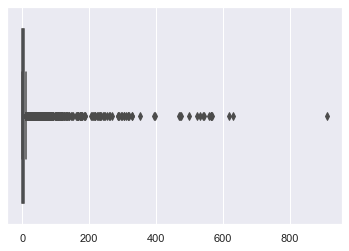

In [62]:
sns.boxplot(tmp) # 'bad distribution'

##### 2) List rare tokens

In [63]:
# unique words --> not useful

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

paraben         1
vinegar         1
glycol          1
oodles          1
ingredients     1
skip            1
bullshit        1
word            1
soapking        1
hop             1
arabicoudh      1
grass           1
students        1
979             1
leafs           1
vegetarian      1
length225       1
6645            1
quantities      1
sscp            1
582             1
appreciation    1
flawers         1
tulip           1
playing         1
balls           1
ballsech        1
repeatedly      1
pmr1918         1
pmba1872        1
dtype: int64

In [64]:
len(list_unique_words)

2114

In [65]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop',
 'arabicoudh',
 'grass',
 'students',
 '979',
 'leafs',
 'vegetarian',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'tulip',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872']

In [66]:
# save it for later

tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv(output_path + "unique_words.csv", index=False)

In [67]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_2_words = tmp[tmp <= 2]
list_max_2_words[:30]

pokizo                2
knows                 2
deluxe                2
prestige              2
birds                 2
thus                  2
styles                2
880                   2
dean                  2
stage                 2
plus                  2
neckspecifications    2
welcomed              2
milton                2
camerii               2
zipper                2
hourglass             2
pressure              2
bib                   2
850                   2
dat                   2
neckerchew            2
chompers              2
v220w                 2
fashionin             2
velcro                2
cheeky                2
bsf                   2
hilton                2
superb                2
dtype: int64

In [68]:
len(list_max_2_words)

3446

In [69]:
# save it

list_max_2_words = list(list_max_2_words.index)
tmp = pd.DataFrame({"words": list_max_2_words})
tmp.to_csv(output_path + "max_2_words.csv", index=False)

In [70]:
# idem for 5 times

tmp = pd.Series(corpus).value_counts()
list_max_5_words = tmp[tmp <= 5]
list_max_5_words[:30]

opener       5
dummy        5
marvel       5
ordinary     5
following    5
watche       5
belt         5
layers       5
trendnet     5
burner       5
fb           5
beach        5
moist        5
995          5
attention    5
vatika       5
strip        5
intel        5
across       5
colored      5
styling      5
appealing    5
polishes     5
serving      5
winter       5
lace         5
loves        5
320          5
fluffy       5
straps       5
dtype: int64

In [71]:
len(list_max_5_words)

4677

In [72]:
# save it

list_max_5_words = list(list_max_5_words.index)
tmp = pd.DataFrame({"words": list_max_5_words})
tmp.to_csv(output_path + "max_5_words.csv", index=False)

##### 3) 2nd cleaning function

In [73]:
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['899', 'eyelet', 'cm', 'floral', 'curtain', 'abstract', 'features', 'elegance', '2', '213', 'look', 'pack', 'rs', 'door', 'polyester', 'interiors', 'key', 'enhances', 'height', 'multicolor', 'price']


In [74]:
len(set(corpus))

6165

In [75]:
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 3396
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']
['eyelet', 'floral', 'curtain', 'made', 'abstract', 'features', 'elegance', 'look', 'pack', 'door', 'polyester', 'interiors', 'high', 'key', 'enhances', 'height', 'quality', 'multicolor', 'price']


In [76]:
len(set(corpus))

3396

##### 4) Stemming and Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word, so they can be analyzed as a single item. Lemmatization is similar to stemming, but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process if producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [77]:
# +/- 3s
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

1227            watch
25086           watch
51090            cash
10462            safe
21355    colorsspecif
21207             due
34820           onlin
29736           brush
38340         product
39202             rrp
13755           kadai
34417          provid
33428             buy
50018            skin
11481           ceram
35096           brass
39258         flexibl
18520           onlin
30983            wear
18664          genuin
25383             buy
38851           choic
8860            cheer
42582             box
5728              buy
4419             fine
49088          eyelet
356             cover
16193           gener
49591            skin
dtype: object

In [78]:
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 2773
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['eyelet', 'qualiti', 'floral', 'curtain', 'made', 'abstract', 'look', 'pack', 'enhanc', 'door', 'featur', 'high', 'key', 'eleg', 'height', 'polyest', 'multicolor', 'price', 'interior']


In [79]:
corpus_lem = process_text_3(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words)
pd.Series(corpus_lem).sample(30)

12740        blade
19277      quality
43716    beautiful
7966         bring
40326         size
44540       review
2711         loved
49609        print
44281        piece
12347     elephant
21150         away
24576     shipping
37687      massage
16978     delivery
45502    extremely
12549        round
40724         cash
5006          hook
26780         dial
50711      sticker
2178         glass
34109      jaipuri
16532        nihar
19476    dimension
43660         rice
34487          bed
43042     purchase
27388         free
16432       fabric
47538         pack
dtype: object

In [80]:
display_tokens_info(corpus_lem)

nb tokens 51097, nb tokens uniques 3123
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester']
['eyelet', 'floral', 'curtain', 'made', 'abstract', 'elegance', 'look', 'feature', 'pack', 'door', 'polyester', 'high', 'key', 'enhances', 'height', 'quality', 'multicolor', 'price', 'interior']


##### 5) Only english words

In [81]:
pd.Series(words.words()).sample(30)

188633      staphylococcic
3429              affiance
212537            Uncinata
231136              weazen
115007           metatarse
125543      noncondensible
72967            foundling
230113             Waiguli
202813            thumping
95362             insnarer
56                  Abaris
184059              snorty
75231               gandul
71527            fluviatic
143048          perjuredly
144220    pharmacosiderite
229465          vocabulary
236433               power
117378          mispassion
97835           iodothyrin
13212               arisen
7669            analogical
107548         liturgician
11163           aphaeresis
171436          rubrically
61719         encumberment
182411                skep
79346            grammatic
170007                rimu
213959          underargue
dtype: object

In [82]:
len(set(words.words()))

235892

In [83]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [84]:
len(set(eng_words))

234377

In [85]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']
['aam', 'aback', 'a', 'aaronit', 'aani', 'abactin', 'aardvark', 'ababdeh', 'abaca', 'aba', 'aaron', 'abac', 'abacist', 'aal', 'ab', 'ababua', 'aardwolf', 'aaru', 'abacay', 'aa', 'abacin', 'abaciscu', 'aalii']


In [86]:
len(set(eng_words_stem))

178311

In [87]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']
['abacination', 'aam', 'aback', 'a', 'aaronic', 'aani', 'abaciscus', 'abacinate', 'abactinally', 'aardvark', 'ababdeh', 'abaca', 'aba', 'aaron', 'aaronite', 'abac', 'abacist', 'aal', 'ab', 'ababua', 'aardwolf', 'aaru', 'abacay', 'aa', 'aaronitic', 'aaronical', 'aalii', 'abactinal', 'abacate']


In [88]:
len(set(eng_words_lem))

233450

In [89]:
corpus = process_text_4(raw_corpus, rejoin=False, lem_or_stem="stem", list_rare_words=list_unique_words, eng_words=eng_words_stem)

display_tokens_info(corpus)

nb tokens 45937, nb tokens uniques 2166
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['eyelet', 'qualiti', 'floral', 'curtain', 'made', 'abstract', 'look', 'pack', 'enhanc', 'door', 'featur', 'high', 'key', 'eleg', 'height', 'polyest', 'multicolor', 'price', 'interior']


In [90]:
len(set(corpus))

2166

In [91]:
corpus_lem = process_text_4(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words, eng_words=eng_words_lem)
pd.Series(corpus_lem).sample(30)

29448        price
32542      adapter
30755         soft
11576         size
15982        drift
1467       product
33503    universal
20314         area
43015         time
35764         bath
31020      sticker
10065       detail
34624     included
4157        casual
2459       however
7425      abstract
3825        orange
28283     shipping
9293        design
30927          box
5804          show
6963         fresh
23167      product
34972        shade
38802         pack
9096         share
37327     purchase
31622          buy
43130      general
41805          aid
dtype: object

In [92]:
len(set(corpus_lem))

2333

In [93]:
corpus

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attent',
 'sure',
 'contemporari',
 'eyelet',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'even',
 'creat',
 'special',
 'moment',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'specif',
 'eleg',
 'polyest',
 

In [94]:
corpus_lem

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'sure',
 'contemporary',
 'eyelet',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'evening',
 'create',
 'special',
 'moment',
 'beauty',
 'given',
 'soothing',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',

In [95]:
tmp = pd.Series(corpus_lem).value_counts()
tmp

product        863
free           618
delivery       567
cash           564
shipping       564
              ... 
captivating      2
nexus            2
teal             2
extended         2
film             2
Length: 2333, dtype: int64

In [96]:
##sns.barplot(x=tmp.index, y=tmp.values)

##### 6) Wordcloud

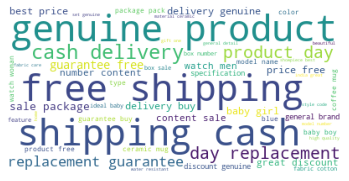

In [97]:
display_wordcloud([corpus_lem])

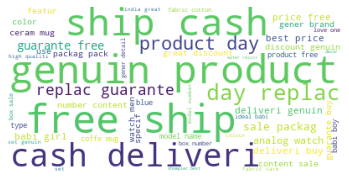

In [98]:
display_wordcloud([corpus])

#### Divide the corpus

##### 1) Separate the 7 categories

In [99]:
for i in range(7):
    globals()["df_" + str(i)] = data_text[data_text.target == i]

In [100]:
df_0.head()

,product_name,text,category,target
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0


In [101]:
df_6.head()

,product_name,text,category,target
5,Maserati Time R8851116001 Analog Watch - For ...,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,"Camerii WM64 Elegance Analog Watch - For Men,...","Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,"Alfajr WY16B Youth Digital Watch - For Men, Boys","Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [102]:
for i in range(7):
    globals()["corpus_" + str(i)] = " ".join(globals()["df_" + str(i)].text)

In [103]:
corpus_0[:1000]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product

In [104]:
len(corpus_0)

72541

In [105]:
len(corpus_6)

49083

##### 2) Process all of them

In [106]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__Before__Category__0
nb tokens 72541, nb tokens uniques 93
Specifications of Sathiyas Cot
['s', 'c', 'e', 'y', 'a', 'p', 'n', 'f', 't', 'S', ' ', 'h', 'C', 'o', 'i']


__Before__Category__1
nb tokens 56618, nb tokens uniques 83
Key Features of Burt s Bees Ha
['s', 'e', 'y', 'K', 'a', 'H', 'u', ' ', 't', 'f', 'B', 'r', 'o', 'F']


__Before__Category__2
nb tokens 83329, nb tokens uniques 87
Key Features of D-Link DAP1320
['a', 't', '0', 'D', 'F', 'K', 'k', '2', 'y', '-', ' ', 'f', '3', 'o', 'r', 'i', 's', 'e', 'L', 'A', '1', 'n', 'u', 'P']


__Before__Category__3
nb tokens 84704, nb tokens uniques 92
Myesquire Ceramic Burner Pot L
['c', 'a', 't', 'm', 'M', 'y', 'q', ' ', 'B', 'C', 'o', 'r', 'i', 's', 'e', 'L', 'n', 'u', 'P']


__Before__Category__4
nb tokens 57118, nb tokens uniques 84
Key Features of Elegance Polye
['s', 'e', 'y', 'c', 'K', 'a', 'n', 'u', 'g', ' ', 't', 'f', 'l', 'r', 'E', 'o', 'F', 'P']


__Before__Category__5
nb tokens 95162, nb tokens uniques 85
Key Features of Du

In [107]:
for i in range(7):
    globals()["corpus_" + str(i)] = process_text_4(globals()["corpus_" + str(i)],
                          rejoin=False,
                          list_rare_words=list_unique_words,
                          eng_words=eng_words_stem)

In [108]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__After__Category__0
nb tokens 7813, nb tokens uniques 790
['specif', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'ye', 'materi', 'cotton', 'design', 'self', 'design', 'gener', 'brand', 'type', 'bath', 'towel', 'model', 'name', 'cotton', 'bath', 'towel']
['machin', 'bath', 'washabl', 'model', 'cotton', 'design', 'brand', 'name', 'specif', 'featur', 'yellow', 'gener', 'self', 'materi', 'towel', 'red', 'blue', 'type', 'ye']


__After__Category__1
nb tokens 5050, nb tokens uniques 769
['key', 'featur', 'burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'ideal', 'boy', 'girl', 'appli', 'deep', 'condit', 'hair', 'condit', 'damag', 'hair', 'hair', 'type', 'dri', 'hair', 'specif', 'burt', 'bee', 'hair', 'repair', 'shea']
['damag', 'condit', 'dri', 'condition', 'girl', 'bee', 'burt', 'grapefruit', 'deep', 'appli', 'boy', 'specif', 'featur', 'hair', 'repair', 'key', 'ideal', 'shea', 'type']


__A

In [109]:
corpus_list = [globals()["corpus_" + str(i)] for i in range(7)]

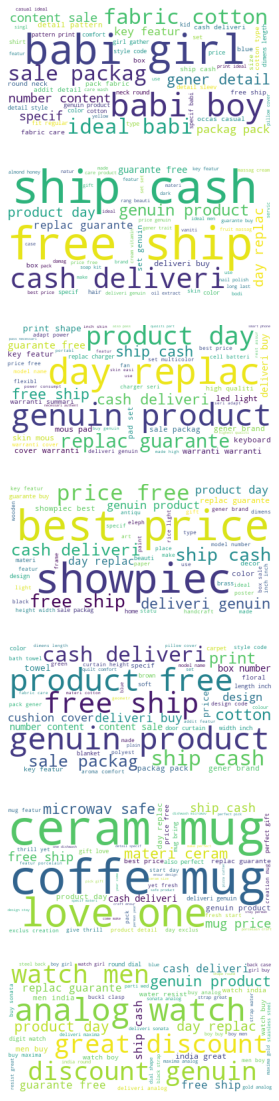

In [110]:
display_wordcloud(corpus_list)

In [111]:
pd.Series(corpus_0).value_counts().head(20)

babi      316
girl      197
cotton    191
detail    180
fabric    164
boy       112
print     105
dress     105
specif    100
ideal      98
gener      96
featur     88
packag     88
sleev      86
type       85
sale       85
color      83
wash       80
neck       80
number     76
dtype: int64

In [112]:
pd.Series(corpus_6).value_counts().head(20)

watch       354
analog      256
men         158
product     136
day         136
deliveri    134
replac      134
cash        134
ship        134
free        134
guarante    134
genuin      134
discount    134
great       134
india       134
buy         134
dial         90
strap        79
boy          67
resist       55
dtype: int64

##### Duplicated words in all of the 7 categories

In [113]:
n = 10
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

[]

In [114]:
n = 20
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['type', 'color']

In [115]:
n = 30
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['specif',
 'ideal',
 'gener',
 'featur',
 'type',
 'color',
 'pack',
 'price',
 'box',
 'product',
 'set']

In [116]:
test = generate_duplicated_words_list(corpus_list, n=20)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 130
The length of the set of duplicated words is 26


In [167]:
duplicated_words_set = generate_duplicated_words_list(corpus_list, n=10)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 51
The length of the set of duplicated words is 12


In [168]:
duplicated_words_set

['price',
 'cotton',
 'design',
 'day',
 'replac',
 'deliveri',
 'buy',
 'guarante',
 'product',
 'free',
 'ship',
 'cash']

#### Final cleaning

In [178]:
l = [w for w in list_unique_words if w in eng_words]
print(len(l))

768


In [176]:
len(l)

768

In [181]:
l = [w for w in list_unique_words if w not in eng_words_stem]
print(len(l))

1702


In [180]:
l

['vinegar',
 'glycol',
 'skip',
 'word',
 'hop',
 'grass',
 'vegetarian',
 'tulip',
 'husband',
 'curriculum',
 'sparkling',
 'tobacco',
 'amber',
 'amongst',
 'tele',
 'salt',
 'mussel',
 'stress',
 'kept',
 'cross',
 'rough',
 'dreamt',
 'os',
 'smaller',
 'teeth',
 'spasm',
 'treatment',
 'foundation',
 'propyl',
 'stearic',
 'pipe',
 'stripe',
 'lilac',
 'glycerin',
 'soup',
 'crown',
 'shag',
 'run',
 'lay',
 'coconut',
 'behind',
 'riva',
 'sorbitol',
 'castor',
 'staff',
 'aura',
 'instrument',
 'buddhist',
 'concept',
 'hut',
 'main',
 'intention',
 'clinic',
 'sam',
 'unisex',
 'surgeon',
 'operate',
 'dune',
 'person',
 'mother',
 'hybrid',
 'maxim',
 'highlight',
 'combined',
 'wrought',
 'shutter',
 'lost',
 'tracer',
 'lumen',
 'knit',
 'filament',
 'fetch',
 'bianca',
 'topic',
 'loving',
 'romantic',
 'text',
 'subject',
 'sensation',
 'meal',
 'learner',
 'management',
 'centric',
 'stir',
 'configuration',
 'result',
 'error',
 'meeting',
 'buzz',
 'diluted',
 'caress'

##### 1) cleaning per document

In [119]:
#data["clean_text"] = data.text.apply(final_clean)
#df = data.copy()
#df["clean_text"] = df.text.parallel_apply(final_clean)

In [182]:
data_text["clean_text"] = data_text.text.apply(lambda x: final_clean(x, process_text_5, "stem", l, eng_words_stem, duplicated_words_set)) # l / list_unique_words

In [183]:
data_text.sample(20)

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
772,Offspring Printed Single Wrapper Multicolor,Buy Offspring Printed Single Wrapper Multicolo...,Baby Care,0,offspr print singl wrapper multicolor genuin,offspr print singl wrapper multicolor,4,5
506,Rega IT Gateway MD7822 MD-7822 MD7822U 6 Cell ...,Buy Rega IT Gateway MD7822 MD-7822 MD7822U 6 C...,Computers,2,gateway cell batteri genuin,gateway cell batteri,3,3
892,MB Cotton Set of Towels,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,Home Furnishing,4,set towel genuin,cotton set towel,1,3
961,FURNISHINGLAND Green Silk Carpet,Key Features of FURNISHINGLAND Green Silk Carp...,Home Furnishing,4,key featur green silk carpet pattern floral sh...,green silk,71,2
654,"The Intellect Bazaar Cotton Bath Towel, Baby T...","Buy The Intellect Bazaar Cotton Bath Towel, Ba...",Baby Care,0,intellect bazaar bath towel babi towel genuin,intellect bazaar cotton bath towel babi towel,6,7
36,Myesquire Ceramic Burner Pot Lemongrass Liquid...,Myesquire Ceramic Burner Pot Lemongrass Liquid...,Home Decor & Festive Needs,3,ceram burner pot liquid air illumin everi corn...,ceram pot air freshen,105,4
72,Garnet Traveller 1500 ml Bottle,Key Features of Garnet Traveller 1500 ml Bottl...,Kitchen & Dining,5,key featur garnet travel bottl stylish look qu...,garnet,20,1
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,84,5
276,Pittsburgh Polo Club PBPC-505-GRN Analog Watch...,Specifications of Pittsburgh Polo Club PBPC-50...,Watches,6,specif pittsburgh polo club analog watch men f...,pittsburgh polo club analog watch men,41,6
995,TRESemme Naturals Vibrantly Smooth Shampoo,Key Features of TRESemme Naturals Vibrantly Sm...,Baby Care,0,key featur natur vibrantli smooth shampoo idea...,natur smooth,39,2


In [122]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["text"], end="\n\n")
    print("__After__")
    print(series["clean_text"], end="\n\n\n")
    print()

__Before__
Specifications of Cotton On Kids Baby Boy's Printed Casual Shirt General Details Pattern Printed Occasion Casual Ideal For Baby Boy's Shirt Details Sleeve Half Sleeve Number of Contents in Sales Package Pack of 1 Brand Fit Regular Fabric Cotton Fit Regular Additional Details Style Code COKB504Black

__After__
kid babi casual shirt detail pattern occas casual babi shirt detail sleev half sleev content fit regular fabric fit regular addit detail style code



__Before__
Key Features of Tks Cotton Hair Towel Size: Medium Height: 56 inch GSM: 30 Usage: Daily Use,Specifications of Tks Cotton Hair Towel (1 Hair towel, Orange) Bath Towel Features Machine Washable Yes Material Cotton Design Checks General Brand Tks Type Hair Towel GSM 30 Model Name HAIR CARE Ideal For Women, Girls Model ID DSCO 125 Color Orange Size Medium Dimensions Length 56 inch Width 26 inch In the Box Sales Package 1 Hair towel

__After__
key hair towel size medium height usag daili use hair towel hair towel or

In [123]:
# check no missing values
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
clean_text      0.0
dtype: float64

# save
data_text.to_csv(output_path + "final_data_text.csv", index=False)

##### 2) cleaning corpus (per category) (like above) : to display wordcloud

In [124]:
for i in range(7):
    globals()["df_clean_" + str(i)] = data_text[data_text.target == i]

In [125]:
df_clean_0.head()

,product_name,text,category,target,clean_text
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,bath towel bath towel red yellow blue bath tow...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key terri face towel size small height terri f...
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key kid babi green top pyjama fabric green kid...
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key kid babi blue grey top pyjama fabric blue ...
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0,key kohl wine bag yellow easi carri bit kohl w...


In [126]:
for i in range(7):
    globals()["corpus_clean_" + str(i)] = " ".join(globals()["df_clean_" + str(i)].clean_text)

for i in range(7):
    globals()["corpus_clean_" + str(i)] = process_text_5(globals()["corpus_clean_" + str(i)],
                                                   rejoin=False,
                                                         lem_or_stem="stem",
                                                   list_rare_words=list_unique_words,
                                                   eng_words=eng_words_stem,
                                                    extra_words=duplicated_words_set)

In [127]:
corpus_clean_list = [globals()["corpus_clean_" + str(i)] for i in range(7)]

In [128]:
corpus_clean_0[:1000]

['bath',
 'towel',
 'bath',
 'towel',
 'red',
 'yellow',
 'blue',
 'bath',
 'towel',
 'machin',
 'washabl',
 'self',
 'bath',
 'towel',
 'model',
 'name',
 'bath',
 'towel',
 'men',
 'model',
 'red',
 'yellow',
 'blue',
 'size',
 'length',
 'width',
 'content',
 'bath',
 'towel',
 'key',
 'terri',
 'face',
 'towel',
 'size',
 'small',
 'height',
 'terri',
 'face',
 'towel',
 'piec',
 'face',
 'towel',
 'assort',
 'bring',
 'soft',
 'towel',
 'export',
 'soft',
 'textur',
 'care',
 'give',
 'feel',
 'export',
 'bath',
 'towel',
 'last',
 'year',
 'famou',
 'fine',
 'absorb',
 'soft',
 'durabl',
 'note',
 'shrinkag',
 'may',
 'vari',
 'pictur',
 'size',
 'may',
 'vari',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dri',
 'wash',
 'first',
 'use',
 'size',
 'face',
 'towel',
 'terri',
 'face',
 'towel',
 'piec',
 'face',
 'towel',
 'assort',
 'bath',
 'towel',
 'terri',
 'face',
 'towel',
 'model',
 'name',
 'men',
 'model',
 'size',
 'small',
 'assort',
 '

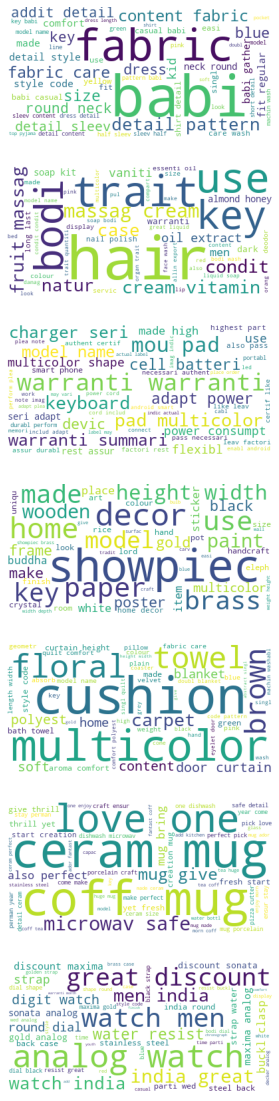

In [129]:
display_wordcloud(corpus_clean_list)

#### Cleaning product_name

In [130]:
raw_corpus = "".join(data_text.product_name.values)
print(raw_corpus[:1_000])
print(len(raw_corpus))

Elegance Polyester Multicolor Abstract Eyelet Door CurtainSathiyas Cotton Bath TowelEurospa Cotton Terry Face Towel SetSANTOSH ROYAL FASHION Cotton Printed King sized Double BedsheetJaipur Print Cotton Floral King sized Double BedsheetMaserati Time R8851116001 Analog Watch  - For BoysCamerii WM64 Elegance Analog Watch  - For Men, BoysT STAR UFT-TSW-005-BK-BR Analog Watch  - For BoysAlfajr WY16B Youth Digital Watch  - For Men, BoysTAG Heuer CAU1116.BA0858 Formula 1 Analog Watch  - For Boys, MenCalibro SW-125 Analog-Digital Watch  - For Men, BoysCartier W6701005 Analog Watch  - For Boys, MenLois Caron LCS-4032 Analog Watch  - For Boys, MenTitan 1639SL03 Analog Watch  - For Boys, MenSrushti Art Jewelry Megnet_Led_Sport_BlackRed1 Digital Watch  - For Men, Women, Boys, GirlsEscort E-1700-906_Blk Analog Watch  - For Men, BoysJack klein BlackLed Digital Watch  - For BoysNorth Moon IW-005-FK Silicone Ion Digital Watch  - For Boys, Girls, WomenFranck Bella FB74C Analog Watch  - For Boys, MenRid

In [131]:
corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 6191, nb tokens uniques 2531
['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtainsathiyas', 'cotton', 'bath', 'toweleurospa', 'cotton', 'terry', 'face', 'towel', 'setsantosh', 'royal', 'fashion', 'cotton', 'printed', 'king', 'sized', 'double', 'bedsheetjaipur', 'print', 'cotton', 'floral', 'king', 'sized', 'double', 'bedsheetmaserati']
['bedsheetmaserati', 'eyelet', 'floral', 'bedsheetjaipur', 'bath', 'terry', 'fashion', 'abstract', 'setsantosh', 'cotton', 'king', 'toweleurospa', 'elegance', 'double', 'door', 'royal', 'sized', 'print', 'polyester', 'towel', 'face', 'printed', 'curtainsathiyas', 'multicolor']


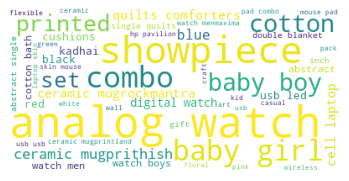

In [132]:
display_wordcloud([corpus])

In [133]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = " ".join(globals()["df_" + str(i)].product_name)


In [134]:
corpus_product_name_0[:1000]

"Sathiyas Cotton Bath Towel Eurospa Cotton Terry Face Towel Set Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set KOHL Wine Bag Yellow CHHOTE JANAB COZY MATTRESS PROTECTOR(SET OF 2) Vitamins Solid Baby Girl's Basic Shorts Vitamins Graphic Print Baby Girl's Basic Shorts Vitamins Embroidered Baby Girl's Denim Shorts florence9 baby cap red checks Cap CHINMAY KIDS Printed Cotton Padded Mosquito Net HEAVENLY Dress Baby Boy's  Combo Bestway 1.47m x 1.47m x 1.22m/Play With Sun Shade Inflatable Play Pool TWISHA Printed Kurti & Salwar FS Mini Klub Baby Boy's Sleepsuit Lollipop Lane Tiddly Wink Safari Bath Set Anthill Baby Boy's, Baby Girl's Bodysuit Toffyhouse Baby Boy's Sleepsuit Earth Conscious Graphic Print Baby Boy's Jumpsuit Poppins Printed Baby Boy's Jumpsuit Babeezworld Baby Boy's Romper cherry crumble california Baby Boy's Dungaree Kandyfloss Baby Boy's, Baby Girl's Romper MKB Baby Girl's Shirt Dress Toddla Baby Girl's Gat

In [135]:
len(corpus_product_name_0)

6137

In [136]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])




__Before__Category__0
nb tokens 6137, nb tokens uniques 69
Sathiyas Cotton Bath Towel Eur
['a', 't', 'l', 'h', 'T', 'y', ' ', 'B', 'S', 'C', 'o', 'r', 'i', 's', 'e', 'n', 'u', 'w', 'E']


__Before__Category__1
nb tokens 7221, nb tokens uniques 74
Burt s Bees Hair Repair Shea A
['s', 'e', 'A', 'a', 'p', 'H', 'u', 'R', ' ', 't', 'B', 'S', 'h', 'r', 'i']


__Before__Category__2
nb tokens 7499, nb tokens uniques 72
D-Link DAP1320 RoQ Slim Multim
['t', '0', 'D', 'm', 'Q', 'k', 'l', '2', 'M', 'R', '-', ' ', 'S', '3', 'o', 'i', 'L', 'A', '1', 'n', 'u', 'P']


__Before__Category__3
nb tokens 7890, nb tokens uniques 72
Myesquire Ceramic Burner Pot L
['c', 'a', 't', 'm', 'M', 'y', 'q', ' ', 'B', 'C', 'o', 'r', 'i', 's', 'e', 'L', 'n', 'u', 'P']


__Before__Category__4
nb tokens 6503, nb tokens uniques 66
Elegance Polyester Multicolor 
['s', 'e', 'c', 'y', 'M', 'a', 'n', 'u', 'g', ' ', 't', 'l', 'E', 'o', 'r', 'P', 'i']


__Before__Category__5
nb tokens 6021, nb tokens uniques 73
Dungri India C

In [137]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = process_text_4(globals()["corpus_product_name_" + str(i)],
                                                                rejoin=False,
                                                                list_rare_words=[],
                                                                eng_words=eng_words_stem)

In [138]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])




__After__Category__0
nb tokens 746, nb tokens uniques 249
['cotton', 'bath', 'towel', 'cotton', 'terri', 'face', 'towel', 'set', 'kid', 'babi', 'girl', 'print', 'green', 'top', 'pyjama', 'set', 'kid', 'babi', 'girl', 'print', 'blue', 'grey', 'top', 'pyjama', 'set', 'kohl', 'wine', 'bag', 'yellow', 'cozi']
['pyjama', 'bath', 'top', 'girl', 'cotton', 'bag', 'babi', 'wine', 'set', 'green', 'print', 'grey', 'cozi', 'yellow', 'kid', 'towel', 'face', 'terri', 'blue', 'kohl']


__After__Category__1
nb tokens 731, nb tokens uniques 331
['burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'suav', 'natur', 'everlast', 'sunshin', 'condition', 'make', 'vaniti', 'case', 'nail', 'polish', 'black', 'lipstick', 'import', 'nail', 'polish', 'black', 'lipstick', 'import', 'scienc', 'dandruff', 'control', 'shampoo']
['suav', 'case', 'lipstick', 'import', 'everlast', 'condition', 'bee', 'burt', 'grapefruit', 'sunshin', 'deep', 'polish', 'scienc', 'natur', 'hair', 'nail', 'black', 

In [139]:
corpus_list_product_name = [globals()["corpus_product_name_" + str(i)] for i in range(7)]


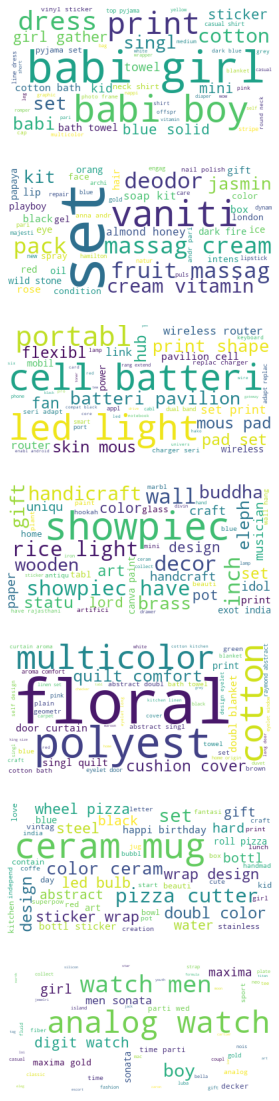

In [140]:
display_wordcloud(corpus_list_product_name)

In [141]:
duplicated_words_set = generate_duplicated_words_list(corpus_list_product_name, n=15)
print(duplicated_words_set)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 16
The length of the set of duplicated words is 11
['sticker', 'cotton', 'print', 'boy', 'led', 'girl', 'light', 'towel', 'doubl', 'set', 'singl']


In [142]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_1_words_product_name = tmp[tmp <= 1]
print(list_max_1_words_product_name[:30])

# save it

list_max_1_words_product_name = list(list_max_1_words_product_name.index)
tmp = pd.DataFrame({"words": list_max_1_words_product_name})
tmp.to_csv(output_path + "product_name_max_1_words.csv", index=False)

carexemex           1
303                 1
38015pl01           1
prabhavali          1
menchappin          1
gtidy               1
multicolorireeya    1
wq18                1
careoxyglow         1
cmantiqueshop       1
blackradhika        1
coral               1
lightsfoolzy        1
98189               1
416                 1
301                 1
womenperucci        1
rked                1
nellson             1
pinkoffspring       1
womenoffspring      1
cnl                 1
qibla               1
toner               1
compass             1
st1025sl07          1
bottleoxyglow       1
rk526               1
elements            1
generation          1
dtype: int64


In [143]:
list_max_1_words_product_name

['carexemex',
 '303',
 '38015pl01',
 'prabhavali',
 'menchappin',
 'gtidy',
 'multicolorireeya',
 'wq18',
 'careoxyglow',
 'cmantiqueshop',
 'blackradhika',
 'coral',
 'lightsfoolzy',
 '98189',
 '416',
 '301',
 'womenperucci',
 'rked',
 'nellson',
 'pinkoffspring',
 'womenoffspring',
 'cnl',
 'qibla',
 'toner',
 'compass',
 'st1025sl07',
 'bottleoxyglow',
 'rk526',
 'elements',
 'generation',
 'watercolors',
 'teal',
 'bodysuitcanon',
 'setsonpra',
 'world',
 'rg',
 'saffron',
 'cartridge',
 'girlslenco',
 'abkl_grn_grn_grnantiqueshop',
 '3003',
 'boysvizion',
 '8502',
 '7purple',
 'girlselantra',
 'tango',
 'dust',
 'plugfogg',
 'covermxofere',
 'store',
 'modish',
 'mb990hn',
 'bdblue',
 'bottleecraftindia',
 'chevron',
 'menmarvel',
 'north',
 'bears',
 'gummy',
 'pineapple',
 'dw100243',
 'mb990ll',
 'dw100405',
 'coupleluba',
 'blackonlinemaniya',
 'figh_008',
 'multicolourfighter',
 'womenbajya',
 'navratri',
 'multicolorsvm',
 'goldrajlaxmi',
 'clues',
 'abkl_pl_pnk_pnkantiquesh

In [144]:
data_text["clean_product_name"] = data_text.product_name.apply(lambda x: final_clean(x, process_text_5, "stem", list_max_1_words_product_name, eng_words_stem, [])) # list_max_1_words_product_name duplicated_words_set

In [145]:
data_text.sample(20)

,product_name,text,category,target,clean_text,clean_product_name
569,Neo Classic NC11-5004_G Analog Watch - For Women,Neo Classic NC11-5004_G Analog Watch - For Wo...,Watches,6,neo classic analog watch neo classic analog wa...,neo classic analog watch
448,3kFactory Baby Shower Cap- Purple,Key Features of 3kFactory Baby Shower Cap- Pur...,Baby Care,0,key babi shower cap purpl easi bath kid cap en...,babi cap purpl
1025,PRINT SHAPES monster university party Laptop S...,Key Features of PRINT SHAPES monster universit...,Computers,2,key shape monster univers parti mous pad glue ...,print shape monster parti skin mous pad set
673,VRCT 5 W LED Bulb,Buy VRCT 5 W LED Bulb for Rs.259 online. VRCT ...,Kitchen & Dining,5,led bulb led bulb,led bulb
220,Poppins Printed Baby Boy's Jumpsuit,Poppins Printed Baby Boy's Jumpsuit\r\n ...,Baby Care,0,poppin babi high full sleev romper suit infant...,poppin print babi boy
982,Rishan Printed Baby Boy's V-neck T-Shirt,Specifications of Rishan Printed Baby Boy's V-...,Baby Care,0,babi neck shirt shirt detail sleev full sleev ...,print babi boy neck
922,Agrasen International Radha Krishna Statue Sho...,Buy Agrasen International Radha Krishna Statue...,Home Decor & Festive Needs,3,intern krishna statu showpiec intern krishna s...,intern krishna statu showpiec
270,Mavi 237MBB Showpiece - 15 cm,Buy Mavi 237MBB Showpiece - 15 cm for Rs.129...,Home Decor & Festive Needs,3,mavi showpiec mavi showpiec,mavi showpiec
341,Belkin Share Modem (N) Router,Buy Belkin Share Modem (N) Router only for Rs....,Computers,2,share router,router
276,Pittsburgh Polo Club PBPC-505-GRN Analog Watch...,Specifications of Pittsburgh Polo Club PBPC-50...,Watches,6,polo club analog watch men function chronograp...,pittsburgh polo club analog watch men


In [146]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["product_name"], end="\n\n")
    print("__After__")
    print(series["clean_product_name"], end="\n\n\n")
    print()

__Before__
Fs Mini Klub Printed Baby Boy's Round Neck T-Shirt

__After__
mini print babi boy round neck



__Before__
RTD Baby Girl's Kurta and Pyjama Set

__After__
babi girl pyjama set



__Before__
chota packet Baby Boy's, Baby Girl's Bodysuit

__After__
babi boy babi girl



__Before__
Babyoye Premium Baby Girl's Multicolor Leggings

__After__
premium babi girl multicolor leg



__Before__
CoffeeBean Regular Fit Baby Girl's Pink Trousers

__After__
regular fit babi girl pink trouser



__Before__
Funcart Frolic Birthday  - Food Grade Plastic

__After__
birthday food grade plastic



__Before__
Chokree Baby Girl's, Girl's A-line Dress

__After__
babi girl girl line



__Before__
Sonpra Baby Boy's Bodysuit

__After__
babi boy



__Before__
Dongli Striped Baby Boy's Polo Neck T-Shirt

__After__
stripe babi boy polo neck



__Before__
Relaxfeel Floral Single Dohar White

__After__
floral singl white





print("Counting number of characters in each row / product")
data_text["_len_clean_text_"] = data_text.clean_text.str.len()
data_text["_len_clean_product_name_"] = data_text.clean_product_name.str.len()


In [184]:
print("Counting number of words in each row / product")
data_text["_len_clean_text_"] = data_text.clean_text.str.split().apply(len)
data_text["_len_clean_product_name_"] = data_text.clean_product_name.str.split().apply(len)


Counting number of words in each row / product


In [185]:
data_text

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6
...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker pack doubl...,extra larg self adhes sticker,215,5
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker pack bring home exc...,larg vinyl sticker sticker,135,4
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...,extra larg sticker,16,3
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...,medium vinyl sticker sticker,10,4


In [149]:
#data_text["_len_clean_text_"].value_counts(normalize=True).plot(kind="pie")

In [186]:
#data_text["_len_clean_text_"].sort_values()
data_text[data_text["_len_clean_text_"] == 0]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_


<AxesSubplot:xlabel='_len_clean_text_'>

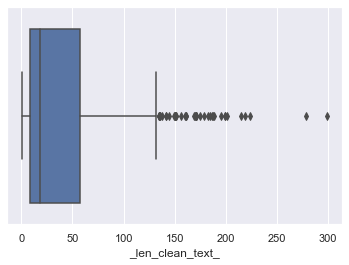

In [187]:
sns.boxplot(data_text["_len_clean_text_"])

In [152]:
data_text[data_text["_len_clean_product_name_"] == 0]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
59,Brillare Science Dandruff Control Shampoo & In...,Specifications of Brillare Science Dandruff Co...,Beauty and Personal Care,1,scienc dandruff control shampoo detail content...,,17,0
119,FRENEMY MPAD271 Mousepad,Key Features of FRENEMY MPAD271 Mousepad smoot...,Computers,2,key smooth surfac finish move quickli glossi r...,,62,0
243,Suruchi Kadhai 4.5 L,Buy Suruchi Kadhai 4.5 L for Rs.965 online. Su...,Kitchen & Dining,5,,,0,0
244,Bergner Kadhai NA L,"Bergner Kadhai NA L (Aluminium, Non-stick)\r\n...",Kitchen & Dining,5,aluminium non stick get strong temper glass li...,,49,0
245,Kalash Kadhai 11.5 L,Buy Kalash Kadhai 11.5 L for Rs.1584 online. K...,Kitchen & Dining,5,,,0,0
246,Peacock Kadhai 3.8 L,Buy Peacock Kadhai 3.8 L for Rs.1155 online. P...,Kitchen & Dining,5,peacock peacock,,2,0
251,Kalash Kadhai 3.5 L,Buy Kalash Kadhai 3.5 L for Rs.549 online. Kal...,Kitchen & Dining,5,,,0,0
252,Metallino Kadhai NA L,Buy Metallino Kadhai NA L for Rs.721 online. M...,Kitchen & Dining,5,,,0,0
255,Jaipan KD2.5 Kadhai 2.5 L,Buy Jaipan KD2.5 Kadhai 2.5 L for Rs.499 onlin...,Kitchen & Dining,5,,,0,0
259,Nirlon Kadhai 3 L,Buy Nirlon Kadhai 3 L for Rs.785 online. Nirlo...,Kitchen & Dining,5,,,0,0


<AxesSubplot:xlabel='_len_clean_product_name_'>

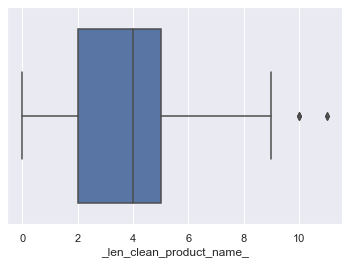

In [153]:
sns.boxplot(data_text["_len_clean_product_name_"])

In [154]:
data_text[(data_text["_len_clean_product_name_"] == 0) & (data_text["_len_clean_text_"] == 0)]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
243,Suruchi Kadhai 4.5 L,Buy Suruchi Kadhai 4.5 L for Rs.965 online. Su...,Kitchen & Dining,5,,,0,0
245,Kalash Kadhai 11.5 L,Buy Kalash Kadhai 11.5 L for Rs.1584 online. K...,Kitchen & Dining,5,,,0,0
251,Kalash Kadhai 3.5 L,Buy Kalash Kadhai 3.5 L for Rs.549 online. Kal...,Kitchen & Dining,5,,,0,0
252,Metallino Kadhai NA L,Buy Metallino Kadhai NA L for Rs.721 online. M...,Kitchen & Dining,5,,,0,0
255,Jaipan KD2.5 Kadhai 2.5 L,Buy Jaipan KD2.5 Kadhai 2.5 L for Rs.499 onlin...,Kitchen & Dining,5,,,0,0
259,Nirlon Kadhai 3 L,Buy Nirlon Kadhai 3 L for Rs.785 online. Nirlo...,Kitchen & Dining,5,,,0,0
312,Intex W150D,Buy Intex W150D only for Rs. 1149 from Flipkar...,Computers,2,,,0,0
323,Tenda TE-F452,Buy Tenda TE-F452 only for Rs. 4509 from Flipk...,Computers,2,,,0,0
327,Edimax BR-6428NC,Buy Edimax BR-6428NC only for Rs. 2150 from Fl...,Computers,2,,,0,0
333,Binatone WR3000N,Buy Binatone WR3000N only for Rs. 1800 from Fl...,Computers,2,,,0,0


In [189]:
# save
data_text.to_csv(output_path + "final_data_text.csv", index=False)

In [156]:
def clean_text(df):
    pass #TODOOOO

### II) Transformations

In [190]:
data = pd.read_csv(output_path + "final_data_text.csv")

In [191]:
data

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6
...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker pack doubl...,extra larg self adhes sticker,215,5
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker pack bring home exc...,larg vinyl sticker sticker,135,4
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...,extra larg sticker,16,3
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...,medium vinyl sticker sticker,10,4


#### 1) Bag of Words : Count words + TF-IDF

In [159]:
# 1) texte / 2) images (paralleles can do)
# 1 vocab pour chaque doc

# texte :
# nettoyage du texte / normalisation (pré ttt cf notebook)
# bag of words
# reduction dimension tSNE ici
# 7 clusters
# ARI score : sur la valeur à obtenir 0.4/0.5 (0.6 ou 0.7)
# objectifs : cours OC x2 + webinair / Youtube
# vendredi

In [160]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [161]:
l_cat = list(set(data['category']))
l_cat

print("catégories : ", l_cat)
y_cat_num = data["target"]### ?? ## [(1-l_cat.index(data.iloc[i]['category'])) for i in range(len(data))]
y_cat_num

catégories :  ['Computers', 'Kitchen & Dining', 'Beauty and Personal Care', 'Baby Care', 'Home Furnishing', 'Home Decor & Festive Needs', 'Watches']


0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: target, Length: 1050, dtype: int64

In [162]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000,
                         init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)

    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))

    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')

    plt.show()
    print("ARI : ", ARI)


In [188]:
data

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key eleg polyest multicolor abstract eyelet do...,eleg polyest multicolor abstract eyelet door,108,6
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,bath towel bath towel red yellow blue bath tow...,cotton bath towel,31,3
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key terri face towel size small height terri f...,cotton terri face towel set,84,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key royal fashion king size doubl royal wed ro...,royal fashion cotton print king size doubl,62,7
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key floral king size doubl floral king size do...,print cotton floral king size doubl,89,6
...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker doubl stic...,extra larg self adhes sticker,212,5
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker bring home exclus p...,larg vinyl sticker sticker,124,4
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...,extra larg sticker,14,3
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...,medium vinyl sticker sticker,8,4


#### 1) fit / transform description - text

##### 1) Préparation sentences

In [272]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'text' # 'text' 0.399 et 0.5567
cv_fit = cvect.fit(data[feat])
ctf_fit = ctf.fit(data[feat])

cv_transform = cvect.transform(data[feat])
ctf_transform = ctf.transform(data[feat])

In [273]:
print(ctf_transform.shape)

(1050, 5843)


##### 2) Exécution des modèles

In [274]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)


CountVectorizer : 
-----------------
ARI :  0.399 time :  16.0

Tf-idf : 
--------
ARI :  0.5567 time :  16.0


##### 3) Graphiques

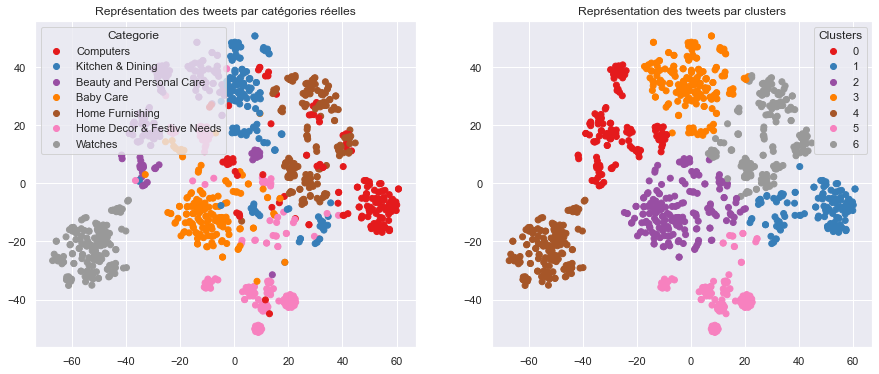

ARI :  0.5567


In [275]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### 2) fit / transform product_name + text

##### 1) Préparation sentences

In [285]:
# création du bag of words (CountVectorizer et Tf-idf)
print("Separate vocabulary")

from sklearn.compose import ColumnTransformer

textual_columns = ['product_name', 'text']

cv_transform = ColumnTransformer([(x, CountVectorizer(stop_words='english', max_df=0.95, min_df=1), x) for x in
                                  textual_columns]).fit_transform(data_text[textual_columns])

ctf_transform = ColumnTransformer([(x, TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1), x) for x in
                                   textual_columns]).fit_transform(data_text[textual_columns])

Separate vocabulary


In [286]:
cv_transform.shape

(1050, 8140)

In [287]:
ctf_transform.shape

(1050, 8140)

##### 2) Exécution des modèles

In [288]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)


CountVectorizer : 
-----------------
ARI :  0.4025 time :  26.0

Tf-idf : 
--------
ARI :  0.5589 time :  16.0


##### 3) Graphiques

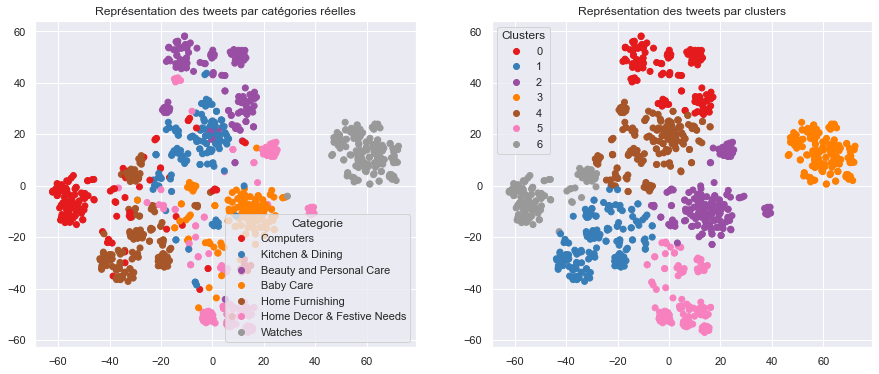

ARI :  0.5589


In [289]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### 3) fit product_name / transform text

##### 1) Préparation sentences

In [290]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat_fit = 'product_name'
cv_fit = cvect.fit(data[feat_fit])
ctf_fit = ctf.fit(data[feat_fit])

feat_transform = 'text'
cv_transform = cvect.transform(data[feat_transform])
ctf_transform = ctf.transform(data[feat_transform])

##### 2) Exécution des modèles

In [291]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)


CountVectorizer : 
-----------------
ARI :  0.3584 time :  17.0

Tf-idf : 
--------
ARI :  0.3514 time :  18.0


##### 3) Graphiques

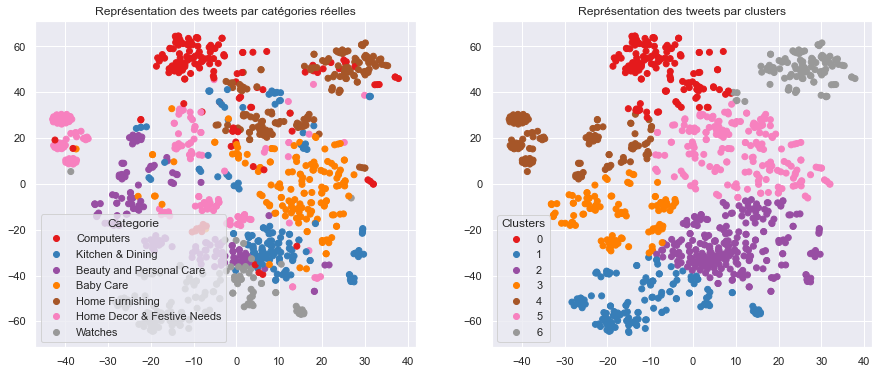

ARI :  0.3514


In [200]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### II) Words Embeddings : Word2Vec

In [316]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import *
from keras.models import Model
import gensim

##### 1) Création du modèle Word2Vec

In [302]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data['clean_text'].to_list() # text : 0.19 ARI
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [303]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 2518
Word2Vec trained


In [304]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 2519


##### 3) Création de la matrice d'embedding

In [305]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0

for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (2519, 300)


##### 4) Création du modèle d'embedding

In [306]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 24, 300)           755700    
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 755,700
Trainable params: 755,700
Non-trainable params: 0
_________________________________________________________________


##### 5) Exécution du modèle

In [307]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [308]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3857 time :  16.0


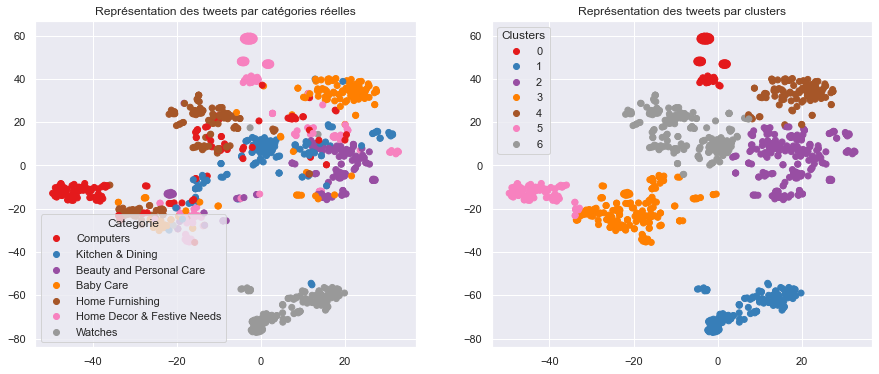

ARI :  0.3857


In [309]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### III) Words Embeddings : BERT

https://www.tensorflow.org/text/guide/word_embeddings

In [323]:
import tensorflow as tf
#import tensorflow_hub as hub
#import tensorflow.keras
from tensorflow.keras import backend as K


from keras import metrics as kmetrics


# Bert
import os
#import transformers
#from transformers import *

from transformers.models.bert.modeling_bert import BertModel,BertForMaskedLM


os.environ["TF_KERAS"]='1'

In [320]:
print(tf.__version__)
#print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
Num GPUs Available:  0
False


##### Fonctions communes

In [321]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True,
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0],
                             bert_inp['token_type_ids'][0],
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot


# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size],
                                                                      bert_tokenizer, max_length)

        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids,
                                 "input_mask" : attention_mask,
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))

    features_bert = np.array(last_hidden_states_tot).mean(axis=1)

    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)

    return features_bert, last_hidden_states_tot

#### 1) BERT HuggingFace

##### 1.1) 'bert-base-uncased'

In [327]:
from transformers import TFAutoModel, AutoTokenizer

In [331]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data['product_name'].to_list() # clean_text 0.29

In [332]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 1s/step
temps traitement :  181.0


In [333]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.6262 time :  19.0


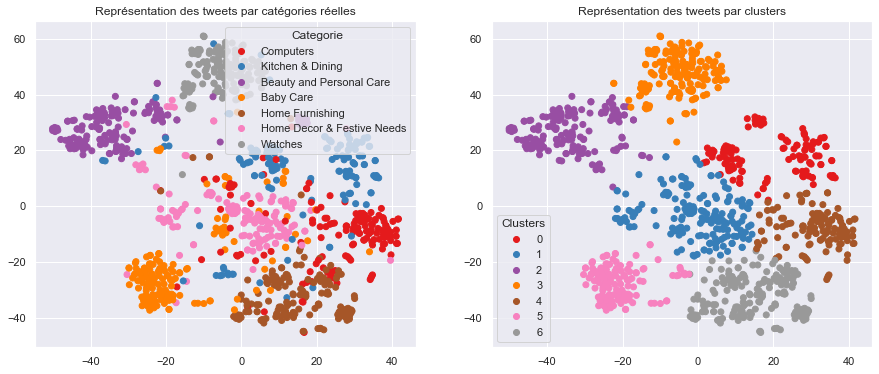

ARI :  0.6262


In [334]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### 'cardiffnlp/twitter-roberta-base-sentiment'
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

In [20]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
sentences = data['text'].to_list()

In [21]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

temps traitement :  61.0


In [22]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.8836 time :  37.0


#### 2) BERT hub Tensorflow

In [25]:
import tensorflow_hub as hub
import tensorflow_text

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [26]:
sentences = data['text'].to_list()

In [27]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  47.0


In [28]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.5805 time :  32.0


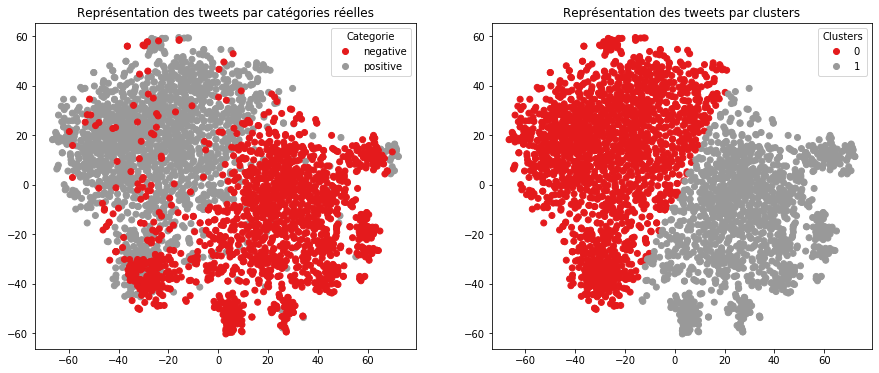

ARI :  0.5805


In [29]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### IV) Words Embeddings : USE (Universal Sentence Encoder)

https://tfhub.dev/google/universal-sentence-encoder/4

In [340]:
import tensorflow as tf
# import tensorflow_hub as hub
#import tensorflow.keras
from keras import backend as K

os.environ["TF_KERAS"]='1'

In [343]:
# Bert
import transformers

In [337]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
False


In [344]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [345]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

##### U

In [368]:
batch_size = 10
sentences = data['product_name'].to_list() # no preprocessing better !! ? to check

In [369]:
features_USE = feature_USE_fct(sentences, batch_size)

In [372]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.6801 time :  16.0


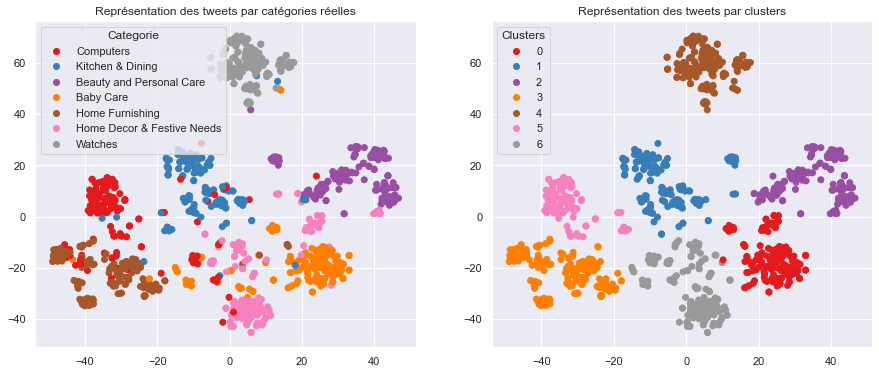

ARI :  0.6801


In [373]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

##### Using text / clean_text : cleaned or not

In [374]:
batch_size = 10
sentences = data['text'].to_list() # no preprocessing better !! ? to check

In [375]:
features_USE = feature_USE_fct(sentences, batch_size)

In [376]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4478 time :  20.0


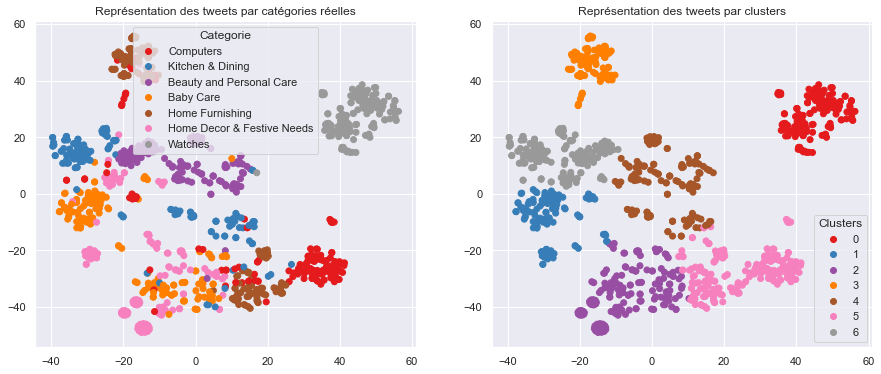

ARI :  0.4478


In [377]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))